## Studying TimeSeries following [course](https://www.youtube.com/watch?v=k9jOeUKRGSs&list=PLtIY5kwXKny91_IbkqcIXuv6t1prQwFhO)

- [ ] Time Series Theory - 
- [ ] Hands on Analysis- 

### Plots:

- [ ] QQ-Plot
- [ ] ACF
- [ ] PACF
- [ ] Season Decomposition graph

### Dickey -Fuller Test

What it is? and why rely when examing timeseries data

- [ ] Data preprocessing

# ☹️ 😐 🙂 😀

# ⌛Time Series Data⌛

 A sequence of information which attaches a <strong>time-period</strong> to each value (anything  measuable and depends on time - ex: prices, humidity or number of people). 
 The time span isn't limited to a total time, it can be seconds, days, decades or century. It must have a starting and an ending.
 
 how often values od the data set are recorded = frequency
  
### Analyzing time-periods:

All time-periods must be EQUAL AND CLEARLY DEFINED, which would result in a CONSTANT ' frequency"

Patterns observed in time-series are expected to persist in the funture.

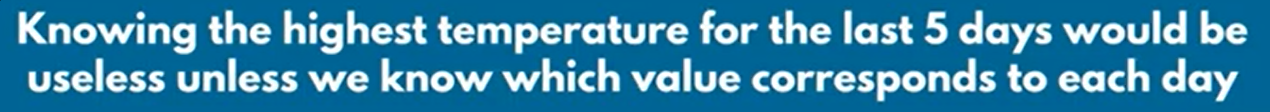


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import pylab

import warnings
warnings.filterwarnings("ignore")

## Importing the Data😊

dataset [here](https://www.kaggle.com/datasets/regaipkurt/financial-markets/code?datasetId=785788)

In [3]:
raw_csv_data = pd.read_csv('Index2018.csv')
df_comp = raw_csv_data.copy()

## Examing the Data

In [4]:
df_comp.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [5]:
df_comp.describe().T.style.format('{:,.2f}')\
                                        .highlight_max(color='#05878a') \
                                         .highlight_min(color='#d3b4ab')
        

,count,mean,std,min,25%,50%,75%,max
spx,"6,269.00","1,288.13",487.59,438.92,990.67,"1,233.42","1,459.99","2,872.87"
dax,"6,269.00","6,080.06","2,754.36","1,911.70","4,069.35","5,773.34","7,443.07","13,559.60"
ftse,"6,269.00","5,422.71","1,145.57","2,876.60","4,486.10","5,662.43","6,304.25","7,778.64"
nikkei,"6,269.00","14,597.06","4,043.12","7,054.98","10,709.29","15,028.17","17,860.47","24,124.15"


In [6]:
df_comp.describe().T.style.format('{:,.2f}')\
                                    .background_gradient(subset=['mean'],cmap='Greens')\
                                    .background_gradient(subset=['std'],cmap='Greens')\
                                    .background_gradient(subset=['min'],cmap='Greens')

,count,mean,std,min,25%,50%,75%,max
spx,"6,269.00","1,288.13",487.59,438.92,990.67,"1,233.42","1,459.99","2,872.87"
dax,"6,269.00","6,080.06","2,754.36","1,911.70","4,069.35","5,773.34","7,443.07","13,559.60"
ftse,"6,269.00","5,422.71","1,145.57","2,876.60","4,486.10","5,662.43","6,304.25","7,778.64"
nikkei,"6,269.00","14,597.06","4,043.12","7,054.98","10,709.29","15,028.17","17,860.47","24,124.15"


The average of the "spx" is a lot lower than the other values
tha maximum value of the "spx" is lower than the min value of the "ftse" and "nikkei"

In [7]:
df_comp.isna().sum()

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

In [8]:
df_comp.spx.isna().sum()

0

### Plotting Data

In [9]:
df_comp.set_index('date',inplace=True)

In [10]:
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
07/01/1994,469.90,2224.95,3445.98,18124.01
10/01/1994,475.27,2225.00,3440.58,18443.44
11/01/1994,474.13,2228.10,3413.77,18485.25
12/01/1994,474.17,2182.06,3372.02,18793.88
13/01/1994,472.47,2142.37,3360.01,18577.26


In [9]:
import matplotlib.pyplot as plt

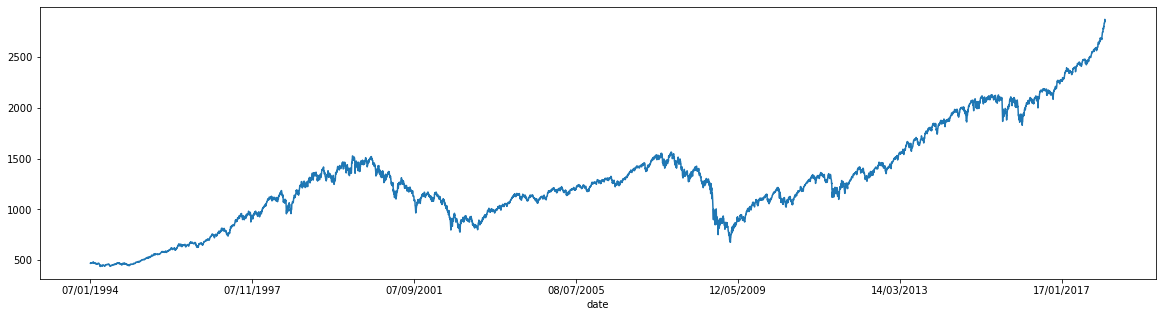

In [14]:
df_comp.spx.plot(figsize=(20,5));

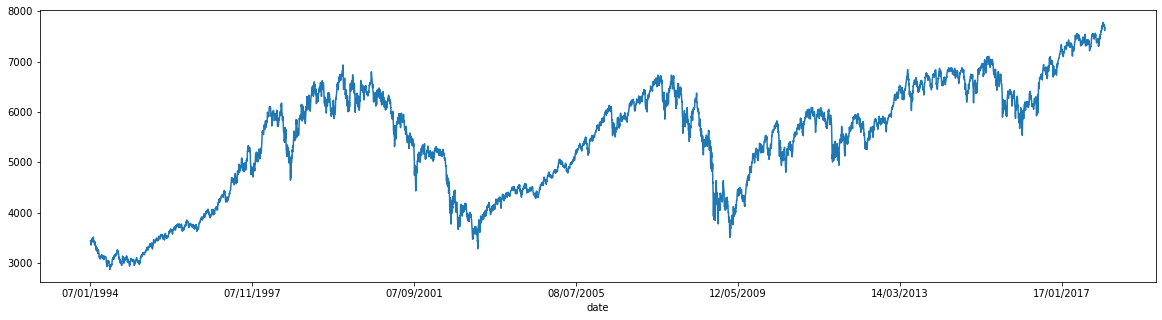

In [15]:
df_comp.ftse.plot(figsize=(20,5));

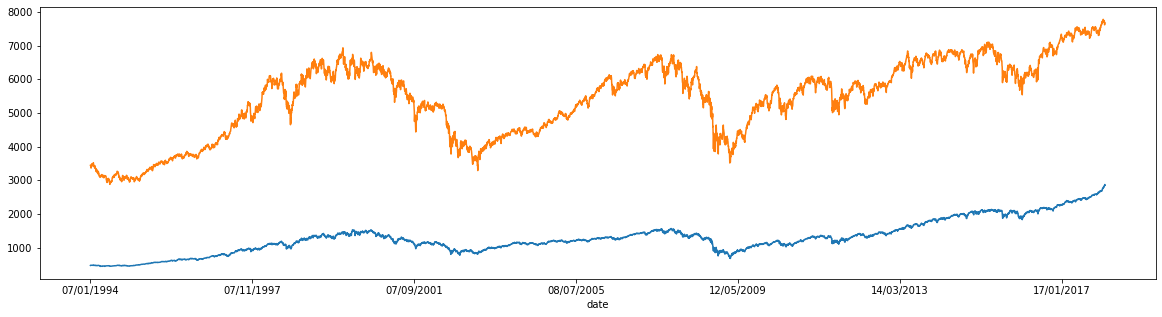

In [16]:
df_comp.spx.plot(figsize=(20,5))
df_comp.ftse.plot(figsize=(20,5));

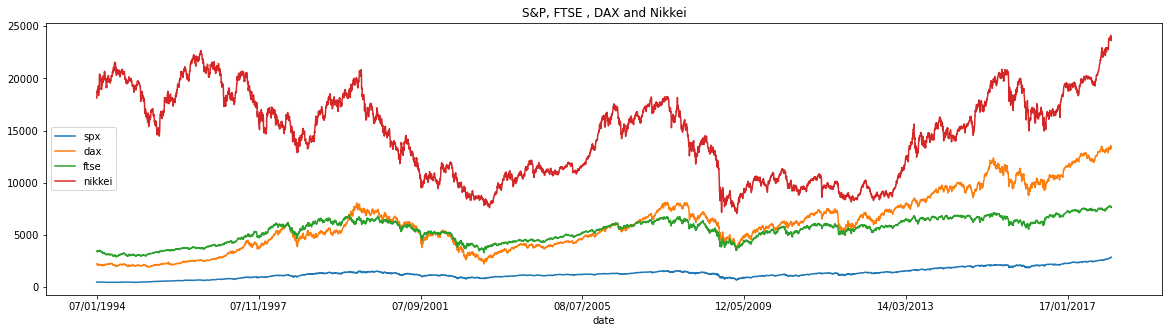

In [13]:

for col in df_comp.columns:
    df_comp[col].plot(figsize=(20,5), label=col)
    plt.title('S&P, FTSE , DAX and Nikkei')
    plt.legend();

### The QQPlot (Quantile-Quantile Plot)
Ussually showcases how the data fits a Normal Distributions

In [9]:
import scipy.stats
import pylab

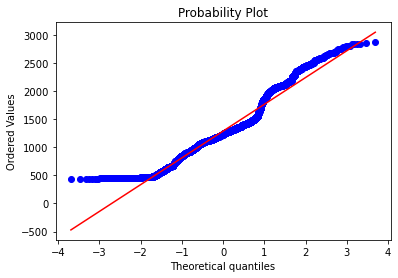

In [11]:
scipy.stats.probplot(df_comp.spx, plot=pylab);


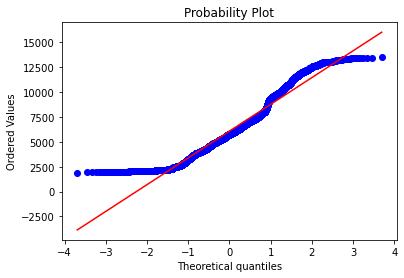

In [22]:
scipy.stats.probplot(df_comp.dax, plot=pylab);

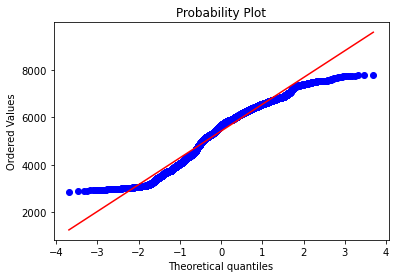

In [23]:
scipy.stats.probplot(df_comp.ftse, plot=pylab);

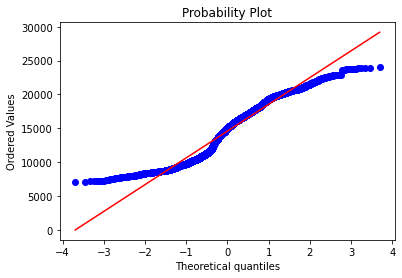

In [24]:
scipy.stats.probplot(df_comp.nikkei, plot=pylab);

The plot takes all the values a variable can take, and arranges them in accending order.

Y - prices, X , theoretical quantalite.(How many standard deviations away from the mean these values are.)

Real diagonal it's what it should follow if normal distributed. So, the data isn't normally distributed.

---

In [12]:
df_comp = df_comp.reset_index()

In [13]:
df_comp.date =pd.to_datetime(df_comp.date, dayfirst=True)

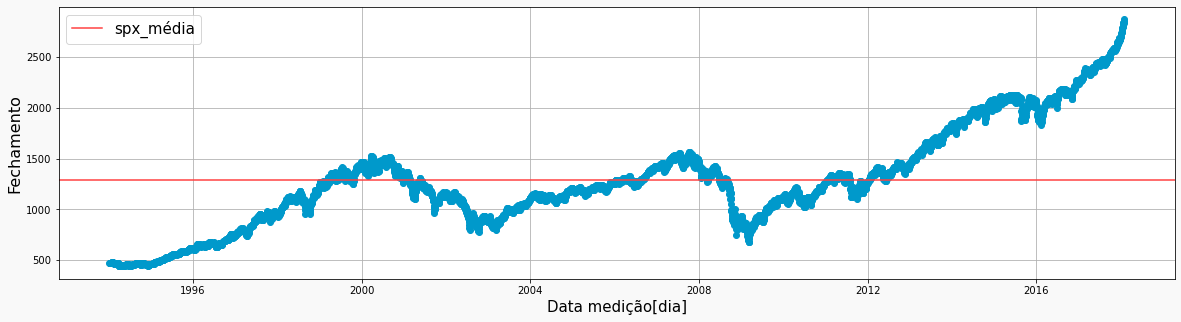

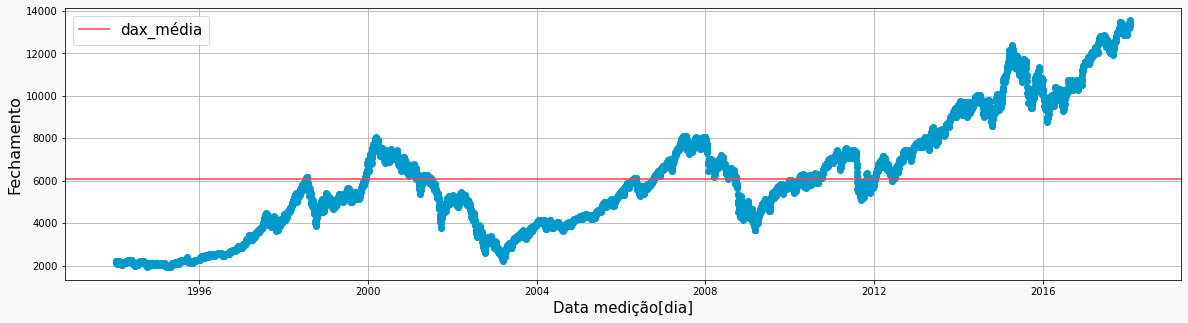

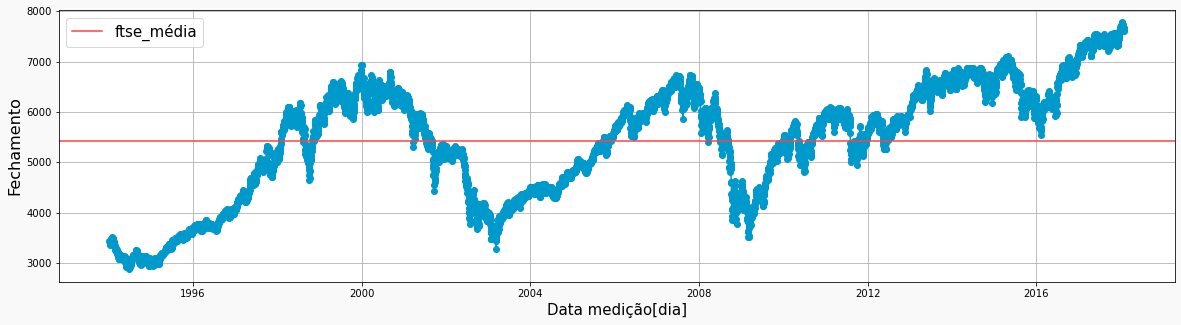

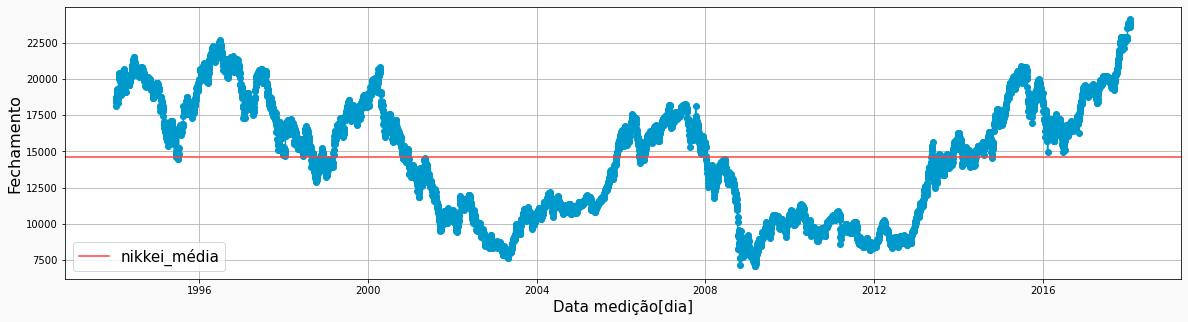

In [14]:
for col in df_comp.columns[1:]:
    
    plt.figure(facecolor='#f9f9f9',edgecolor= '#4a646c',figsize=(20,5))
    plt.plot(df_comp.date , df_comp[col],'o-',color='#0099cb')#
    plt.xlabel('Data medição[dia]',fontsize= 15)
    plt.ylabel('Fechamento',fontsize=16)
    plt.axhline(df_comp[col].mean(),c = '#ff4040',label=f'{col}_média')
    plt.grid(True, 'both','both')
    #plt.xticks(df_comp.iloc[range(0,len(df_comp),1),0],rotation=90)
    plt.legend(fontsize=15);

In [32]:
df_comp.head()

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.90,2224.95,3445.98,18124.01
1,1994-01-10,475.27,2225.00,3440.58,18443.44
2,1994-01-11,474.13,2228.10,3413.77,18485.25
3,1994-01-12,474.17,2182.06,3372.02,18793.88
4,1994-01-13,472.47,2142.37,3360.01,18577.26


In [15]:
df_comp.date.describe(datetime_is_numeric=True)

count                             6269
mean     2006-01-14 19:36:59.492742144
min                1994-01-07 00:00:00
25%                2000-01-11 00:00:00
50%                2006-01-12 00:00:00
75%                2012-01-19 00:00:00
max                2018-01-29 00:00:00
Name: date, dtype: object

## Setting the index

In [16]:
df_comp.set_index('date', inplace=True)

In [17]:
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


## Setting the Frequency

In [18]:
# seet As 'd'= bussiness days, 

df_comp = df_comp.asfreq('b')

In [19]:
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


## Handling Missing Values

In [20]:
df_comp.isna().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

As the frequency was set to 'business days' generated values for which it doesn't have value. Therefore the Nan's

### method fillna() :

- 1) Front filling: assigns the value of the previous period.
 
 day 2 is Nan so it assigns the same value as day 1
 
 
- 2) Back Filling; assigns the value for the next period.
 
 day 2 is Nan so it assigns the same value as day 3 
 
 
- 3)Assign the same value: the average 

In [21]:
df_comp.spx = df_comp.spx.fillna(method='ffill')
df_comp.ftse = df_comp.ftse.fillna(method='bfill')
df_comp.dax = df_comp.dax.fillna(value = df_comp.dax.mean())
df_comp.nikkei = df_comp.nikkei.fillna(method='ffill')



# raw_csv_data = pd.read_csv('Index2018.csv')
# df_comp = raw_csv_data.copy()
# df_comp.date = pd.to_datetime(df_comp.date, dayfirst=True)
# df_comp.set_index('date', inplace=True)
# df_comp = df_comp.asfreq('b')
# df_comp = df_comp.fillna(method='ffill')

In [22]:
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [30]:
df_comp.to_csv("df_treated.csv",index=True,date_format='%Y-%d-%m')

In [32]:
pd.read_csv('df_treated.csv').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6277 entries, 0 to 6276
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    6277 non-null   object 
 1   spx     6277 non-null   float64
 2   dax     6277 non-null   float64
 3   ftse    6277 non-null   float64
 4   nikkei  6277 non-null   float64
dtypes: float64(4), object(1)
memory usage: 245.3+ KB


### Simplifying the Dataset

In [33]:
df_comp['market_value'] = df_comp.spx

In [34]:
df_comp.describe()

,spx,dax,ftse,nikkei,market_value
count,6277.000000,6277.000000,6277.000000,6277.000000,6277.000000
mean,1288.642547,6080.063363,5423.690398,14597.672753,1288.642547
std,487.868210,2752.604984,1145.568370,4043.795272,487.868210
min,438.920000,1911.700000,2876.600000,7054.980000,438.920000
25%,992.715221,4070.460000,4487.880000,10701.130000,992.715221
50%,1233.761241,5774.380000,5663.300000,15030.510000,1233.761241
75%,1460.250000,7442.660000,6304.630175,17860.470000,1460.250000
max,2872.867839,13559.600000,7778.637689,24124.150000,2872.867839


In [35]:
del df_comp['spx']

In [36]:
df_comp.describe()

,dax,ftse,nikkei,market_value
count,6277.000000,6277.000000,6277.000000,6277.000000
mean,6080.063363,5423.690398,14597.672753,1288.642547
std,2752.604984,1145.568370,4043.795272,487.868210
min,1911.700000,2876.600000,7054.980000,438.920000
25%,4070.460000,4487.880000,10701.130000,992.715221
50%,5774.380000,5663.300000,15030.510000,1233.761241
75%,7442.660000,6304.630175,17860.470000,1460.250000
max,13559.600000,7778.637689,24124.150000,2872.867839


In [37]:
del df_comp['dax'], df_comp['ftse'],df_comp['nikkei']

In [45]:
df_comp.head()

,market_value
date,
1994-01-07,469.90
1994-01-10,475.27
1994-01-11,474.13
1994-01-12,474.17
1994-01-13,472.47


In [47]:
df_comp.to_csv('df_treated_simplified.csv',index=True,date_format='%Y-%d-%m')

---